In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.common import SettingWithCopyWarning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers

In [167]:
data =pd.read_csv('/content/drive/MyDrive/python/data/cardio_train.csv',sep=";")
# load the data
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [168]:
#결측치 확인
data.isnull().sum()

#이상치 제거
#age
age_mean = data['age'].mean()
age_std = data['age'].std()
indexNames = data[data['age'] < age_mean - 3*age_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['age'] > age_mean + 3*age_std].index
data.drop(indexNames , inplace=True)
print('age:',data.shape)
#gender
gen_mean = data['gender'].mean()
gen_std = data['gender'].std()
indexNames = data[data['gender'] < gen_mean - 3*gen_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['gender'] > gen_mean + 3*gen_std].index
data.drop(indexNames , inplace=True)
print('gender:',data.shape)
#height
height_mean = data['height'].mean()
height_std = data['height'].std()
indexNames = data[data['height'] < height_mean - 3*height_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['height'] > height_mean + 3*height_std].index
data.drop(indexNames , inplace=True)
print('height:',data.shape)
#weight
weight_mean = data['weight'].mean()
weight_std = data['weight'].std()
indexNames = data[data['weight'] < weight_mean - 3*weight_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['weight'] > weight_mean + 3*weight_std].index
data.drop(indexNames , inplace=True)
print('weight:',data.shape)
#bp
bp_mean = data['ap_hi'].mean()
bp_std = data['ap_hi'].std()
indexNames = data[data['ap_hi'] < bp_mean - 3*bp_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['ap_hi'] > bp_mean + 3*bp_std].index
data.drop(indexNames , inplace=True)

bp_mean = data['ap_lo'].mean()
bp_std = data['ap_lo'].std()
indexNames = data[data['ap_lo'] < bp_mean - 3*bp_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['ap_lo'] > bp_mean + 3*bp_std].index
data.drop(indexNames , inplace=True)
print('bp:',data.shape)
#cholesterol
cholesterol_mean = data['cholesterol'].mean()
cholesterol_std = data['cholesterol'].std()
indexNames = data[data['cholesterol'] < cholesterol_mean - 3*cholesterol_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['cholesterol'] > cholesterol_mean + 3*cholesterol_std].index
data.drop(indexNames , inplace=True)
print('cholesterol:',data.shape)
#glucose
gluc_mean = data['gluc'].mean()
gluc_std = data['gluc'].std()
indexNames = data[data['gluc'] < gluc_mean - 3*gluc_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['gluc'] > gluc_mean + 3*gluc_std].index
data.drop(indexNames , inplace=True)
print('glucose:',data.shape)
#smoke
smoke_mean = data['smoke'].mean()
smoke_std = data['smoke'].std()
indexNames = data[data['smoke'] < smoke_mean - 3*smoke_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['smoke'] > smoke_mean + 3*smoke_std].index
data.drop(indexNames , inplace=True)
print('smoke:',data.shape)
#alcohol
alco_mean = data['alco'].mean()
alco_std = data['alco'].std()
indexNames = data[data['alco'] < alco_mean - 3*alco_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['alco'] > alco_mean + 3*alco_std].index
data.drop(indexNames , inplace=True)
print('alcohol:',data.shape)
#activity
active_mean = data['active'].mean()
active_std = data['active'].std()
indexNames = data[data['active'] < active_mean - 3*active_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['active'] > active_mean + 3*active_std].index
data.drop(indexNames , inplace=True)
print('activity:',data.shape)
#cardio
cardio_mean = data['cardio'].mean()
cardio_std = data['cardio'].std()
indexNames = data[data['cardio'] < cardio_mean - 3*cardio_std].index
data.drop(indexNames , inplace=True)
indexNames = data[data['cardio'] > cardio_mean + 3*cardio_std].index
data.drop(indexNames , inplace=True)
print('cardio:',data.shape)

age: (69996, 13)
gender: (69996, 13)
height: (69703, 13)
weight: (69024, 13)
bp: (68067, 13)
cholesterol: (68067, 13)
glucose: (62937, 13)
smoke: (57373, 13)
alcohol: (55699, 13)
activity: (55699, 13)
cardio: (55699, 13)


In [169]:
#As you can see there are no null values in the data frame. Delete the 'id' feature that does not provide important information.
data=data.drop(['id'],axis=1)
#The 'Age' feature counts age by days. Convert it to age by years.
data['age']=data['age']/365

data = pd.DataFrame(data)
data.to_csv('data_cardio.csv',index=False, header=True)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [170]:
info_cardio = data[['age','gender','height','weight','ap_hi','ap_lo','cholesterol',
                       'gluc','smoke','alco','active']]
cardio = data[['cardio']]

# creating train and test sets
train_info_cardio = info_cardio[:50000]
train_cardio = cardio[:50000]

test_info_cardio = info_cardio[50000:]
test_cardio = cardio[50000:]

print(info_cardio.shape, cardio.shape)
print(train_info_cardio.shape, train_cardio.shape,test_info_cardio.shape, test_cardio.shape)

(55699, 11) (55699, 1)
(50000, 11) (50000, 1) (5699, 11) (5699, 1)


In [171]:
model = Sequential()

x = tf.keras.layers.Input(shape=[11])
h = tf.keras.layers.Dense(32, activation='relu')(x)
h = tf.keras.layers.Dense(32, activation='relu')(h)
y = tf.keras.layers.Dense(1)(h)
model = tf.keras.models.Model(x,y)
model.compile(loss='Huber', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(train_info_cardio, train_cardio, epochs=100, verbose=1)
model.save('cardio_predict.h5')

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 11)]              0         
_________________________________________________________________
dense_45 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_46 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 33        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1563/1563 [==============================] - 4s 2ms/step - loss: 2.3085 - accuracy: 0.5673
Epoch 2/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1159 - accuracy: 0.6576
Epoch 3/100
1563/1563 [=========================

In [172]:
test_info_cardio = model.predict(test_info_cardio)
# test_info_cardio = test_info_cardio.tolist()

test_info_cardio = pd.DataFrame(test_info_cardio,columns=['cardio'])
# test_info_cardio1['cardio'] = test_info_cardio

test_info_cardio.to_csv('cardio.csv',index=False, header=True)
cardio=pd.read_csv('cardio.csv')

print(cardio)
print(test_cardio)

                     cardio
0       [0.283514142036438]
1     [0.44067418575286865]
2      [0.5521161556243896]
3     [0.22735881805419922]
4      [0.7313485145568848]
...                     ...
5694   [0.7150359153747559]
5695   [0.3533583879470825]
5696   [0.7011736631393433]
5697   [0.5877541303634644]
5698  [0.46853721141815186]

[5699 rows x 1 columns]
       cardio
62807       0
62808       0
62810       1
62811       0
62812       1
...       ...
69992       1
69993       1
69994       1
69998       1
69999       0

[5699 rows x 1 columns]


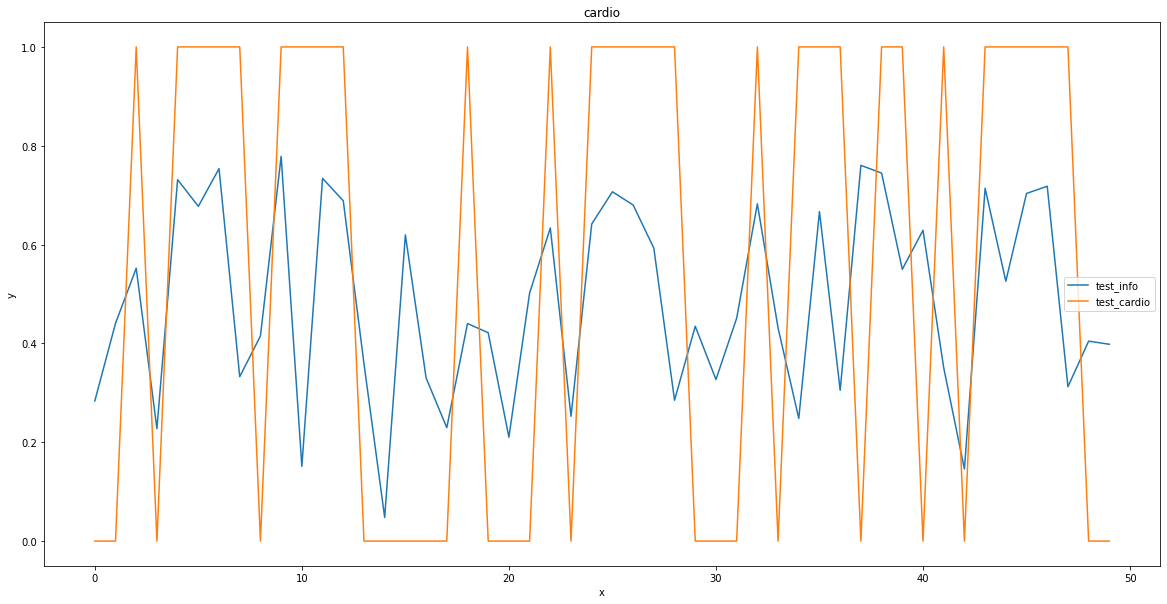

In [173]:
x = test_info_cardio[:50]

y = test_cardio['cardio']
y = y.tolist()
y = y[:50]

plt.figure(figsize=(20,10))
plt.plot(x,label='test_info')
plt.plot(y,label='test_cardio')
plt.xlabel('x')
plt.ylabel('y')
plt.title('cardio')
plt.legend()

plt.show()

In [174]:
# test_info_cardio = pd.read_csv('/content/test_info_cardio.csv', sep=";")
# test_info_cardio.columns=['cardio']
# test_info_cardio
# test_info_cardio.to_csv('test_info_cardio.csv',index=False)

In [175]:
test_info_cardio

[[0.283514142036438],
 [0.44067418575286865],
 [0.5521161556243896],
 [0.22735881805419922],
 [0.7313485145568848],
 [0.677431583404541],
 [0.7537015676498413],
 [0.33271825313568115],
 [0.41497719287872314],
 [0.7785512208938599],
 [0.1513357162475586],
 [0.7340683937072754],
 [0.68857741355896],
 [0.3591373562812805],
 [0.04790794849395752],
 [0.6195569038391113],
 [0.330267071723938],
 [0.22955727577209473],
 [0.44024014472961426],
 [0.4216412305831909],
 [0.21022570133209229],
 [0.5018898248672485],
 [0.6336095333099365],
 [0.25248628854751587],
 [0.6416077613830566],
 [0.7069047689437866],
 [0.6801062822341919],
 [0.5927754640579224],
 [0.2850043773651123],
 [0.4347418546676636],
 [0.3269774317741394],
 [0.45102882385253906],
 [0.6824877262115479],
 [0.4312783479690552],
 [0.24820232391357422],
 [0.6667479276657104],
 [0.30510270595550537],
 [0.7603344917297363],
 [0.744673490524292],
 [0.5499616861343384],
 [0.6289589405059814],
 [0.3507327437400818],
 [0.1459103226661682],
 [0.7